# Digital Signal Processing

### MsCV - ViBOT - MAIA

In [4]:
%matplotlib inline
%pprint off

# To make some nice plot
import matplotlib.pyplot as plt
# To play with arrays
import numpy as np

Pretty printing has been turned OFF


## Reminder 1 


Plotx(t)=sin(2pift), f=1hz

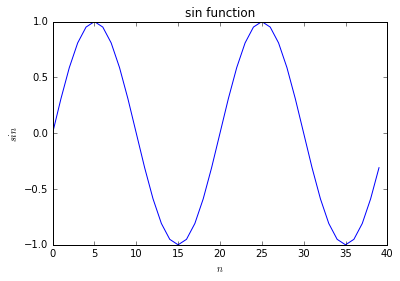

In [5]:
x_t=np.arange(0.,2.,1./20)
y_t=np.sin(2*np.pi*1*x_t)
plt.plot(y_t)
plt.xlabel(r'$n$')
plt.ylabel(r'$sin$')
plt.title('sin function')

             


Plot $x[n] = sin(2\pi f n)$ with frequency step of $f_s$
$$x[n] = sin(2\pi\frac{f}{f_s}n)$$

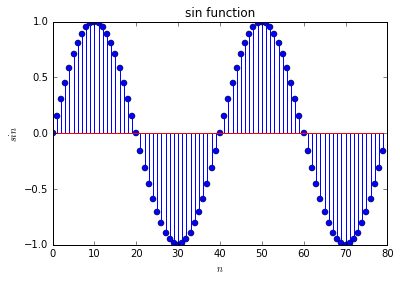

In [6]:
x_t=np.arange(0.,2.,1./40)
y_t=np.sin(2*np.pi*1*x_t)
plt.stem(y_t)
plt.xlabel(r'$n$')
plt.ylabel(r'$sin$')
plt.title('sin function')

## Exercise 1 - Causality

 **1.1** Considering the system defined by the equation $y_k=(x_k+x_{k+1})/2$, check its causality property by examining the response to the signal $H(k-4)$ or `step(4,N)`.

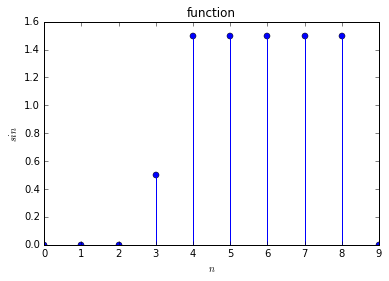

In [7]:
def step(n=0,N=20):
    if n > N-1:
        raise valueError('n should be inferior to N-1')
    #Create the array
    s=np.zeros((N,))
    #placeing the step
    s[n:N]=1
    
    return s
N=10
k=4
x=step(k,N)
y_k = np.zeros((N,))
for i in range(0,N-1):
     y_k[i]=(x[i]+x[i+1]/2)
    
plt.stem(y_k)
plt.xlabel(r'$n$')
plt.ylabel(r'$sin$')
plt.title('function')    
    

**1.2** Propose a modification to obtain a causal version

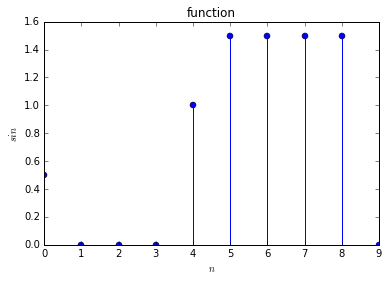

In [8]:
y_k = np.zeros((N,))
for i in range(0,N-1):
     y_k[i]=(x[i]+x[i-1]/2)
    
plt.stem(y_k)
plt.xlabel(r'$n$')
plt.ylabel(r'$sin$')
plt.title('function')    

Comments on your observations

## Exercise 2 - stability

**2.1** Program the primitive (accumulator) operator `prim(f)` applied on the signal  `f` of length `N`. The value of the vector returned by `prim` at the index `k` will correspond to $F_k$ with `k` $\leq$ `N`. Note $F_k=\sum_{q=-\infty}^{k}f_k$. Discuss on the result of the primitive operator applied to the signal $H(k-4)$. Is the primitive operator stable ?



In [9]:
def prim(f,k):
    N=20
    
    if k > N-1:
        raise ValueError('n should be inferior to N-1')
    s =np.zeros((N,))
    s[0]= f[0]
    for i in range(1,k):
        s[i]=s[i-1]+f[i]
    return s
    
    
    
    
    

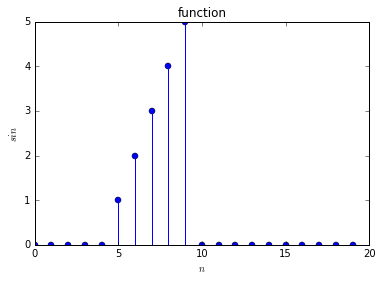

In [10]:
k=5
f=step(k)
y=prim(f,10)
    
plt.stem(y)
plt.xlabel(r'$n$')
plt.ylabel(r'$sin$')
plt.title('function')    

**2.2** What is the impulse response of the primitive operator (in the discrete domain) ?

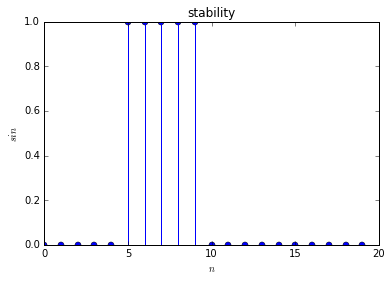

In [11]:
def dirac(n=0, N=20):
    if n > N -1:
        raise valueError('n should be inferior to N-1')
    #create the array
    s=np.zeros((N, ))
    # place the dirac
    s[n]=1
    
    return s
k=5
f=dirac(k)
y=prim(f,10)
    
plt.stem(y)
plt.xlabel(r'$n$')
plt.ylabel(r'$sin$')
plt.title('stability') 
    

**2.3** Test the stability of the system defined by the equation: $y_k=x_k+2y_{k-1}$. Plot the impulse response.

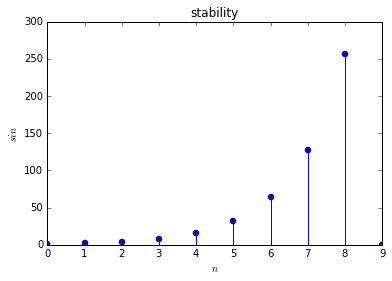

In [12]:
N=10
xk=dirac(n=0)
yk = np.zeros((N,))

yk[0]=xk[0]
for i in range(1,N-1):
     yk[i]=xk[i]+ 2*yk[i-1]




plt.stem(yk)
plt.xlabel(r'$n$')
plt.ylabel(r'$sin$')
plt.title('stability') 

**2.4** Test the stability of the system defined by the equation: $y_k=x_k+y_{k-1}/3$. 

Plot the impulse response.

In [20]:
N=10
xk=dirac(n=0)
yk = np.zeros((N,))

yk[0]=xk[0]
for i in range(1,N-1):
     yk[i]=xk[i]+ (yk[i-1]/3




plt.stem(yk)
plt.xlabel(r'$n$')
plt.ylabel(r'$sin$')
plt.title('stability') 

SyntaxError: invalid syntax (<ipython-input-20-244d45245973>, line 12)

Comments your observations

## Excercise 3 - Invariance and linearity
 

**3.1** Define the following signals: ${\tt x_a=[0\, 0\,  0 \, 0 \, 1 \, 2 \, 3 \, 4 \, 5 \, 0 \, 0 \, 0 \, 0\,  0\,  0\,  0\,  0\,  0\,  0]; x_b=[0\,  0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0 \, 4 \, 3 \, 2 \, 1 \, 0 \, 0 \, 0 \, 0 \, 0 \, 0];}$. Compute the responses $y_a$, $y_b$ according to the equation $y=3x_{k-1}-2x_k+x_{k+1}$

plot your responses with their corresponding input.


**3.2** Prove the system defined by the previous equation is linear (and invariant). Write the equation as a convolution equation.


**3.3** Propose a nonlinear/noninvariant system.